In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data.csv")
data_excel=pd.read_excel("data.xlsx")

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [5]:
from typing import List

def remove_columns(df:pd.DataFrame,columns:List[str]):
    df.drop(columns,axis=1,inplace=True)
    return df

In [6]:
data=remove_columns(data,["Unnamed: 0.1","Unnamed: 0","name"])

In [7]:
data.columns

Index(['brand', 'price', 'spec_rating', 'processor', 'CPU', 'Ram', 'Ram_type',
       'ROM', 'ROM_type', 'GPU', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'warranty'],
      dtype='object')

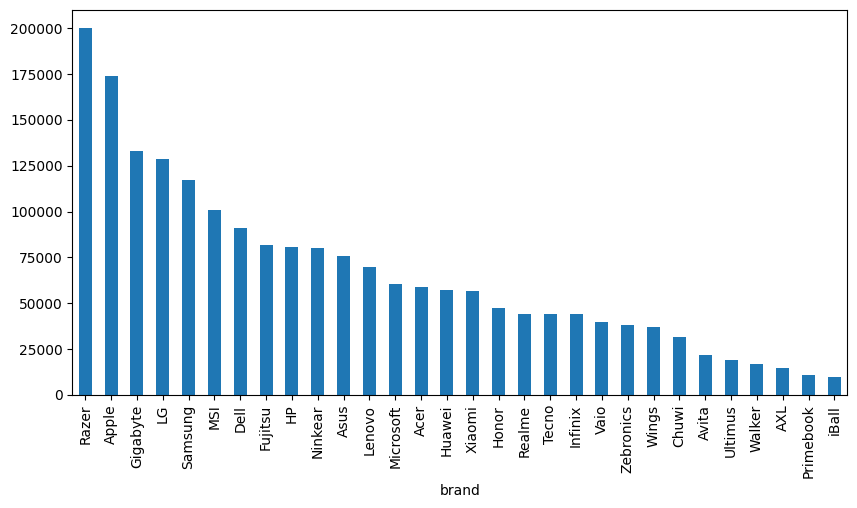

In [8]:
plt.figure(figsize=(10,5))
data.groupby(["brand"])["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.show()

- average price of laptop with respective brand
- Laptop from Razer having highest average price followed by Apple,Gigabyte,LG,Samsung

60.0
69.3790264145972
89.0


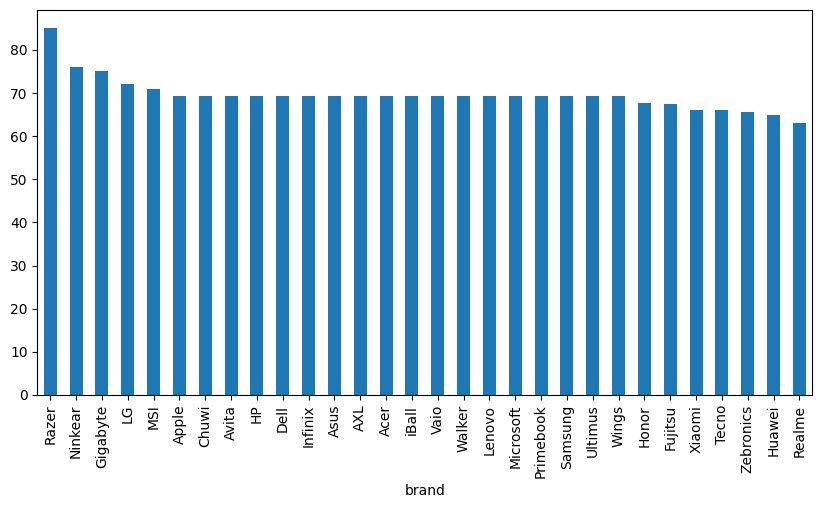

In [9]:
plt.figure(figsize=(10,5))
data.groupby(["brand"])["spec_rating"].median().sort_values(ascending=False).plot(kind="bar")
print(min(data.spec_rating))
print(data.spec_rating.mean())
print(max(data.spec_rating))
plt.show()

In [10]:
numerical_cols=data.select_dtypes(["int64","float32","float64"]).columns

In [11]:
numerical_cols

Index(['price', 'spec_rating', 'display_size', 'resolution_width',
       'resolution_height', 'warranty'],
      dtype='object')

In [12]:
import seaborn as sns

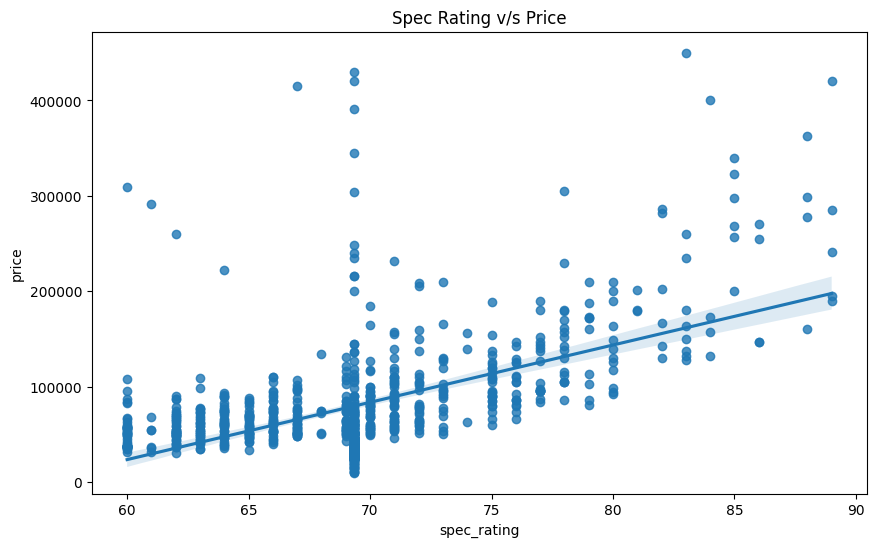

In [13]:
plt.figure(figsize=(10,6))
plt.title("Spec Rating v/s Price")
sns.regplot(data=data,x="spec_rating",y="price")
plt.show()

- seems that price is proportional along with spec rating
- also representing that not perfectly proportional to spec rating but also with some other features

<Axes: xlabel='display_size'>

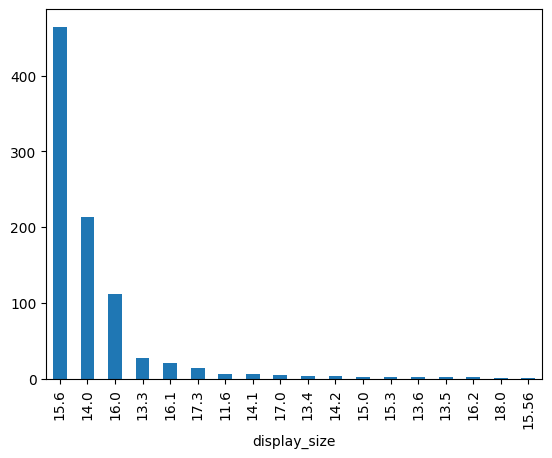

In [14]:
data.display_size.value_counts().plot(kind="bar")

<Axes: xlabel='display_size', ylabel='price'>

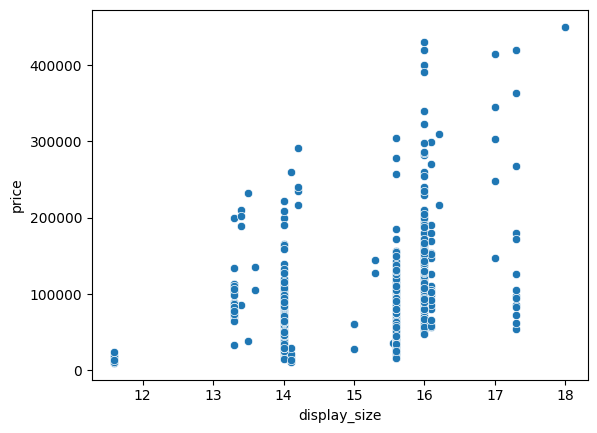

In [15]:
sns.scatterplot(data=data,x="display_size",y="price")

In [16]:
data.resolution_width.value_counts()

resolution_width
1920.0    680
2560.0     70
1366.0     41
2880.0     40
3840.0     14
3200.0     11
1080.0      8
1600.0      5
3024.0      4
1200.0      4
3456.0      4
2160.0      3
2240.0      2
2496.0      2
1280.0      2
2256.0      1
3072.0      1
1440.0      1
Name: count, dtype: int64

<Axes: xlabel='resolution_width', ylabel='price'>

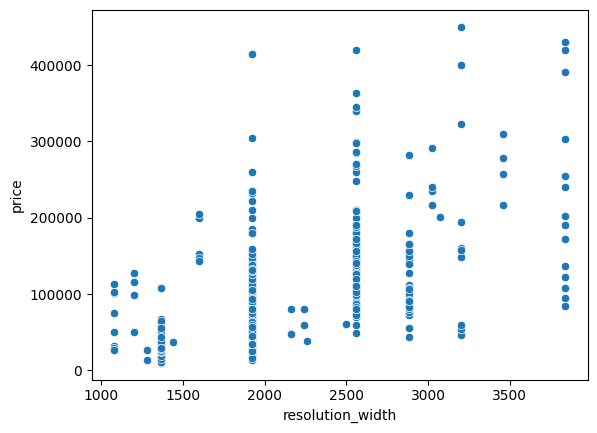

In [17]:
sns.scatterplot(data=data,x="resolution_width",y="price")

In [18]:
data[numerical_cols].corr()

,price,spec_rating,display_size,resolution_width,resolution_height,warranty
price,1.000000,0.546391,0.233815,0.586042,0.604748,0.117101
spec_rating,0.546391,1.000000,0.274206,0.337649,0.328525,0.109501
display_size,0.233815,0.274206,1.000000,0.125088,0.029692,0.041126
resolution_width,0.586042,0.337649,0.125088,1.000000,0.731557,0.024199
resolution_height,0.604748,0.328525,0.029692,0.731557,1.000000,-0.001060
warranty,0.117101,0.109501,0.041126,0.024199,-0.001060,1.000000


- by checking correlation b/w price and other features it is good to remove warranty feature because less correlated with price
- resolution_height and resolution_width is correlated with 0.731 which introduce multicollinear in features,so it is good to remove one of them 
- resolution_width correlation with price is 0.586 and resolution_height correlation with price is 0.6047 so it is better to remove resolution_width

##### Selected features from numerical columns
- spec_rating
- resolution_height
- display_size

In [19]:
categorical_features=data.select_dtypes(["object"]).columns
categorical_features

Index(['brand', 'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type',
       'GPU', 'OS'],
      dtype='object')

In [20]:
features=["spec_rating","resolution_height","display_size"]+list(categorical_features)
features

['spec_rating',
 'resolution_height',
 'display_size',
 'brand',
 'processor',
 'CPU',
 'Ram',
 'Ram_type',
 'ROM',
 'ROM_type',
 'GPU',
 'OS']

In [21]:
data.processor.values[:14]

array(['5th Gen AMD Ryzen 5 5600H', '12th Gen Intel Core i3 1215U',
       '11th Gen Intel Core i3 1115G4', '12th Gen Intel Core i5 1240P',
       'Apple M1', '12th Gen Intel Core i5 1240P',
       '12th Gen Intel Core i3 1215U', '13th Gen Intel Core i5 13420H',
       '12th Gen Intel Core i5 12500H', '12th Gen Intel Core i5 1240P',
       '12th Gen Intel Core i7 1255U', 'Intel Celeron  N4020',
       '12th Gen Intel Core i5 12500H', 'MediaTek MTK8788'], dtype=object)

In [22]:
import regex as re
pattern=r"(intel|amd|apple|mediatek)"
processor_processed=[re.findall(pattern,item.lower()) for item in data.processor.values]

In [23]:
elements=[elem[0] for elem in processor_processed ]

In [24]:
data['processor']=elements

In [25]:
data.processor[:5]

0      amd
1    intel
2    intel
3    intel
4    apple
Name: processor, dtype: object

<BarContainer object of 9 artists>

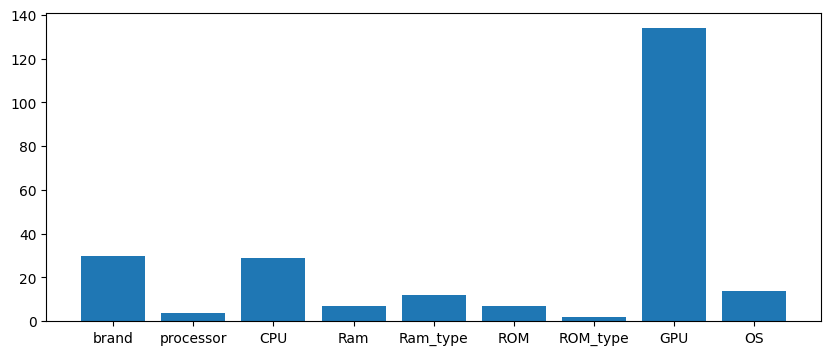

In [26]:
variants=[]
for i in categorical_features:
    elem=len(data[i].value_counts())
    variants.append(elem)
plt.figure(figsize=(10,4))
plt.bar(categorical_features,variants)

In [27]:
data.GPU[:10]

0         4GB AMD Radeon RX 6500M
1              Intel UHD Graphics
2          Intel Iris Xe Graphics
3        Intel Integrated Iris Xe
4    Apple M1 Integrated Graphics
5          Intel Iris Xe Graphics
6              Intel UHD Graphics
7     6GB NVIDIA GeForce RTX 4050
8                   Intel Iris Xe
9          Intel Iris Xe Graphics
Name: GPU, dtype: object

In [28]:
import regex as re
pattern=r"(intel|arm|amd|apple|nvidia|radeon|geforce|iris xe graphics|core|integrated uhd graphics)"
gpu_processed=[re.findall(pattern,item.lower()) for item in data.GPU.values]

In [29]:
gpu_processed

[['amd', 'radeon'],
 ['intel'],
 ['intel', 'iris xe graphics'],
 ['intel'],
 ['apple'],
 ['intel', 'iris xe graphics'],
 ['intel'],
 ['nvidia', 'geforce'],
 ['intel'],
 ['intel', 'iris xe graphics'],
 ['intel'],
 ['intel', 'integrated uhd graphics'],
 ['nvidia', 'geforce'],
 ['arm'],
 ['amd', 'radeon'],
 ['nvidia', 'geforce'],
 ['intel'],
 ['intel'],
 ['nvidia', 'geforce'],
 ['nvidia', 'geforce'],
 ['amd', 'radeon'],
 ['core'],
 ['nvidia', 'geforce'],
 ['intel', 'iris xe graphics'],
 ['amd', 'radeon'],
 ['amd', 'radeon', 'amd'],
 ['amd'],
 ['intel'],
 ['nvidia', 'geforce'],
 ['intel'],
 ['nvidia', 'geforce'],
 ['nvidia', 'geforce'],
 ['amd', 'radeon'],
 ['amd'],
 ['nvidia', 'geforce'],
 ['intel'],
 ['nvidia', 'geforce'],
 ['intel'],
 ['intel'],
 ['nvidia', 'geforce'],
 ['intel'],
 ['nvidia', 'geforce'],
 ['intel'],
 ['intel'],
 ['nvidia', 'geforce'],
 ['nvidia', 'geforce'],
 ['intel'],
 ['amd', 'radeon', 'radeon'],
 ['nvidia', 'geforce'],
 ['nvidia', 'geforce'],
 ['intel', 'intel'],
 [

In [30]:
mapp={"integrated uhd graphics":"intel",
      "geforce":"nvidia",
      "radeon":"amd",
      "iris xe graphics":"intel",
      }
elements=[elem[0] for elem in gpu_processed]
data["GPU"]=elements


In [31]:
data["GPU"]=data["GPU"].replace(mapp)

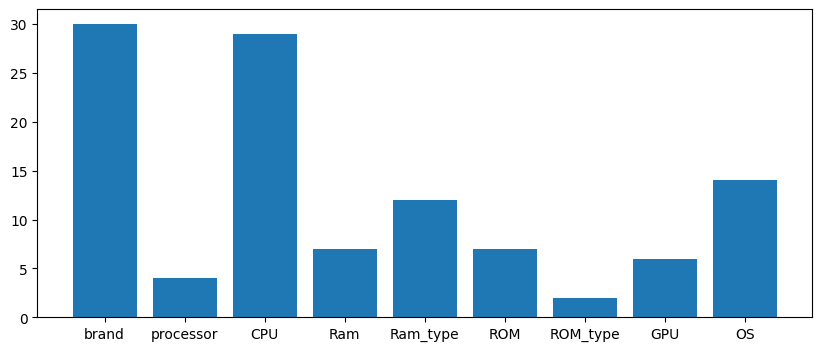

In [32]:
variants=[]
for i in categorical_features:
    elem=len(data[i].value_counts())
    variants.append(elem)
plt.figure(figsize=(10,4))
plt.bar(categorical_features,variants)
plt.show()

In [33]:
data.CPU.value_counts().index

Index(['Quad Core, 8 Threads', 'Hexa Core, 12 Threads',
       '10 Cores (2P + 8E), 12 Threads', 'Octa Core, 16 Threads',
       '12 Cores (4P + 8E), 16 Threads', 'Dual Core, 4 Threads',
       '14 Cores (6P + 8E), 20 Threads', 'Hexa Core (2P + 4E), 8 Threads',
       'Octa Core (4P + 4E), 12 Threads', 'Dual Core, 2 Threads',
       '10 Cores (6P + 4E), 16 Threads', '24 Cores (8P + 16E), 32 Threads',
       '16 Cores (8P + 8E), 24 Threads', '14 Cores (6P + 8E)',
       '5 Cores (1P + 4E), 6 Threads', 'Octa Core (4P + 4E)',
       'Octa Core, 8 Threads', 'Quad Core, 4 Threads', 'Octa Core', '12 Cores',
       'Quad Core', '10 Cores', '10 Cores (8P + 2E)', '10 Cores, 12 Threads',
       '14 Cores, 20 Threads', '16 Cores, 32 Threads', 'Octa Core, 12 Threads',
       '24 Cores (8P + 16E)', '20 Threads'],
      dtype='object', name='CPU')

##### encoding of categorical values according to their specifications


In [34]:
cpu_performance = {
    'Quad Core, 8 Threads': 3,
    'Hexa Core, 12 Threads': 4,
    '10 Cores (2P + 8E), 12 Threads': 5,
    'Octa Core, 16 Threads': 6,
    '12 Cores (4P + 8E), 16 Threads': 7,
    'Dual Core, 4 Threads': 1,
    '14 Cores (6P + 8E), 20 Threads': 8,
    'Hexa Core (2P + 4E), 8 Threads': 3,
    'Octa Core (4P + 4E), 12 Threads': 5,
    'Dual Core, 2 Threads': 1,
    '10 Cores (6P + 4E), 16 Threads': 6,
    '24 Cores (8P + 16E), 32 Threads': 10,
    '16 Cores (8P + 8E), 24 Threads': 9,
    '14 Cores (6P + 8E)': 7,
    '5 Cores (1P + 4E), 6 Threads': 2,
    'Octa Core (4P + 4E)': 4,
    'Octa Core, 8 Threads': 4,
    'Quad Core, 4 Threads': 2,
    'Octa Core': 3,
    '12 Cores': 5,
    'Quad Core': 2,
    '10 Cores': 4,
    '10 Cores (8P + 2E)': 6,
    '10 Cores, 12 Threads': 5,
    '14 Cores, 20 Threads': 8,
    '16 Cores, 32 Threads': 9,
    'Octa Core, 12 Threads': 5,
    '24 Cores (8P + 16E)': 10,
    '20 Threads': 6
}

In [35]:
ram_performance = {
    '2GB': 1,
    '4GB': 2,
    '8GB': 3,
    '12GB': 4,
    '16GB': 5,
    '32GB': 6,
    '64GB': 7
}

In [36]:
rom_performance = {
    '32GB': 1,
    '64GB': 2,
    '128GB': 3,
    '256GB': 4,
    '512GB': 5,
    '1TB': 6,
    '2TB': 7
}


In [37]:
ram_type_performance = {
    'DDR': 1,
    'DDR3': 2,
    'DDR4': 3,
    'DDR4-': 3,  
    'DDR5': 5,
    'LPDDR4': 3,
    'LPDDR4X': 4,
    'LPDDR4x': 4,  
    'LPDDR5': 5,
    'LPDDR5X': 6,
    'LPDDR5x': 6,  
    'Unified': 4  
}

In [38]:
rom_type_performance = {
    'SSD': 2,  
    'Hard-Disk': 1  
}

In [39]:
import regex as re
pattern=r"(windows|chrome|dos|mac|ubuntu|android)"
os_processed=[re.findall(pattern,item.lower()) for item in data.OS.values]

In [40]:
elements=[elem[0] for elem in os_processed]

In [41]:
data["OS"]=elements

In [42]:
data[data["GPU"]==9]

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty


In [43]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for column in ["brand","processor","OS","GPU"]:
    data[column]=encoder.fit_transform(data[column])

In [44]:
data["CPU"]=data["CPU"].replace(cpu_performance)
data["Ram"]=data["Ram"].replace(ram_performance)
data["ROM"]=data["ROM"].replace(rom_performance)
data["Ram_type"]=data["Ram_type"].replace(ram_type_performance)
data["ROM_type"]=data["ROM_type"].replace(rom_type_performance)


C:\Users\Kalyan\AppData\Local\Temp\ipykernel_15400\869896957.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["CPU"]=data["CPU"].replace(cpu_performance)
C:\Users\Kalyan\AppData\Local\Temp\ipykernel_15400\869896957.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Ram"]=data["Ram"].replace(ram_performance)
C:\Users\Kalyan\AppData\Local\Temp\ipykernel_15400\869896957.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly ca

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[features],data["price"],test_size=0.2)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [47]:
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression().fit(x_train,y_train)
model_linear.score(x_test,y_test)

0.6410715499684545

In [53]:
from sklearn.ensemble import RandomForestRegressor
model_random=RandomForestRegressor(n_estimators=100).fit(x_train,y_train)

In [54]:
print(f"Training Score: {model_random.score(x_train,y_train)}")
print(f"Testing Score: {model_random.score(x_test,y_test)}")

Training Score: 0.9721289486680015
Testing Score: 0.7449365222518327


In [55]:
x_train.columns

Index(['spec_rating', 'resolution_height', 'display_size', 'brand',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU', 'OS'],
      dtype='object')